In [208]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [209]:
import lal
import lalsimulation as lalsim
import numpy as np

In [210]:
#approx=lalsim.SEOBNRv4
m1 = 30
m2 = 30
s1 = [0,0,0]#[0.4,-0.2,0.43]
s2 = [0,0,0]#[-0.1,0.8,0]
dist = 400.
iota = 0
phi_c = 0.

deltaT = 1./4096
f_ref = 20.
f_low = 20

longAscNodes = 0
eccentricity = 0 
meanPerAno = 0
nonGRdict = lal.CreateDict()

Text(0, 0.5, 'Strain')

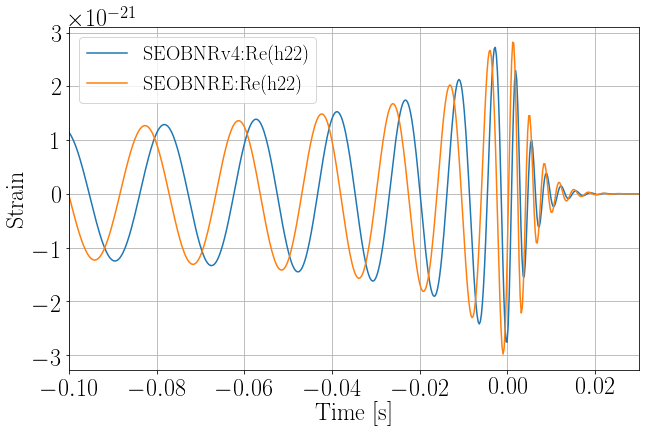

In [211]:
data = np.loadtxt("./h22.txt")
nqc = lal.CreateREAL8Vector(10)

for version in [4]:
    nqc = lal.CreateREAL8Vector(10)
    hlm,dylow,dyhigh = lalsim.SimIMRSpinAlignedEOBModes(deltaT,\
                                m1 * lal.MSUN_SI, m2 * lal.MSUN_SI,\
                                f_low, dist * 1e6 * lal.PC_SI,\
                                s1[2],s2[2],\
                                int(version),\
                                0,0,0,0,0,0,0,0,\
                                0,0,\
                                nqc,0)
    t1 = np.arange(hlm.mode.data.length, dtype=float) * hlm.mode.deltaT
    t1 = t1 + hlm.mode.epoch
    plt.plot(t1, np.real(hlm.mode.data.data), label='SEOBNRv'+str(version)+':Re(h22)')
plt.plot(data[:,0],data[:,1],label='SEOBNRE:Re(h22)')
plt.legend()
plt.xlim(-0.1,0.03)
plt.xlabel('Time [s]')
plt.ylabel('Strain')

Text(0, 0.5, 'Strain')

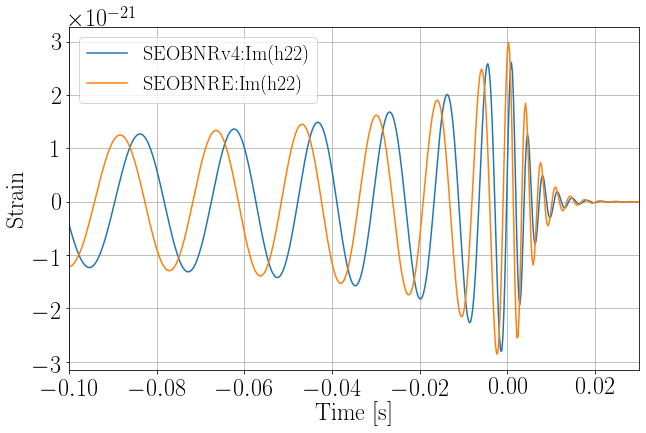

In [212]:
plt.plot(t1, np.imag(hlm.mode.data.data), label='SEOBNRv'+str(version)+':Im(h22)')
plt.plot(data[:,0],data[:,2],label='SEOBNRE:Im(h22)')
plt.legend()
plt.xlim(-0.1,0.03)
plt.xlabel('Time [s]')
plt.ylabel('Strain')

Text(0.5, 0, 'Time [s]')

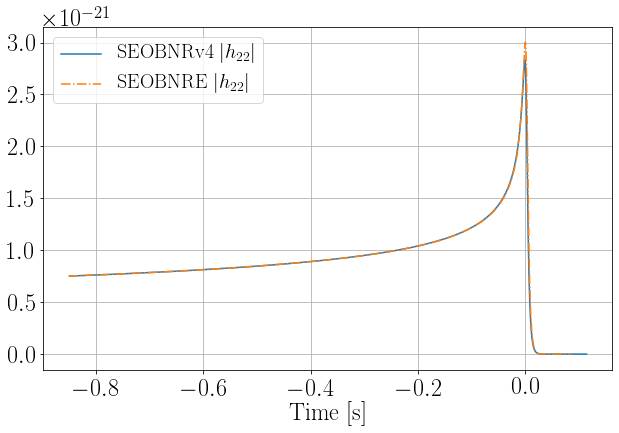

In [213]:
plt.plot(t1, np.abs(hlm.mode.data.data), label='SEOBNRv'+str(version)+' $|h_{22}|$')
plt.plot(data[:,0],np.sqrt(data[:,1]**2+data[:,2]**2),ls='-.',label='SEOBNRE $|h_{22}|$')
plt.legend()
plt.xlabel('Time [s]')